In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### BANKNIFTY DATA

In [2]:
bnf = yf.download('^NSEBANK', start='2020-01-01', end='2023-04-01', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
bnf.tail

<bound method NDFrame.tail of                                    Open          High           Low  \
Date                                                                  
2020-01-02 00:00:00+05:30  32133.150391  32465.449219  32121.400391   
2020-01-03 00:00:00+05:30  32326.949219  32329.800781  31960.400391   
2020-01-06 00:00:00+05:30  31910.449219  31914.449219  31170.550781   
2020-01-07 00:00:00+05:30  31598.050781  31851.449219  31200.900391   
2020-01-08 00:00:00+05:30  30995.500000  31451.849609  30899.550781   
...                                 ...           ...           ...   
2023-03-24 00:00:00+05:30  39555.250000  39767.898438  39294.898438   
2023-03-27 00:00:00+05:30  39484.699219  39695.199219  39273.750000   
2023-03-28 00:00:00+05:30  39545.050781  39645.199219  39326.101562   
2023-03-29 00:00:00+05:30  39611.550781  40055.000000  39609.550781   
2023-03-31 00:00:00+05:30  40231.250000  40690.398438  40180.199219   

                                  Close     Ad

In [4]:
bnf.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### TRENDLINE

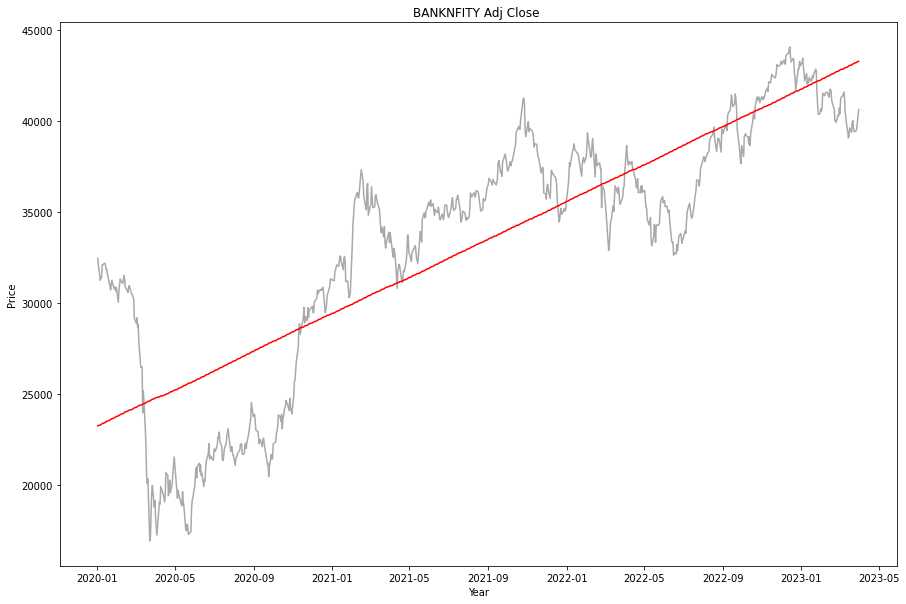

In [6]:
plt.figure(figsize=(15,10))
x = np.arange(bnf["Adj Close"].size)
fit = np.polyfit(x, bnf["Adj Close"], deg=1)
fit_function = np.poly1d(fit)
sns.lineplot(data=bnf["Adj Close"], color="darkgrey")
sns.lineplot(x=bnf["Adj Close"].index, y=fit_function(x), color="red")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("BANKNFITY Adj Close ")
plt.show()

### SETS

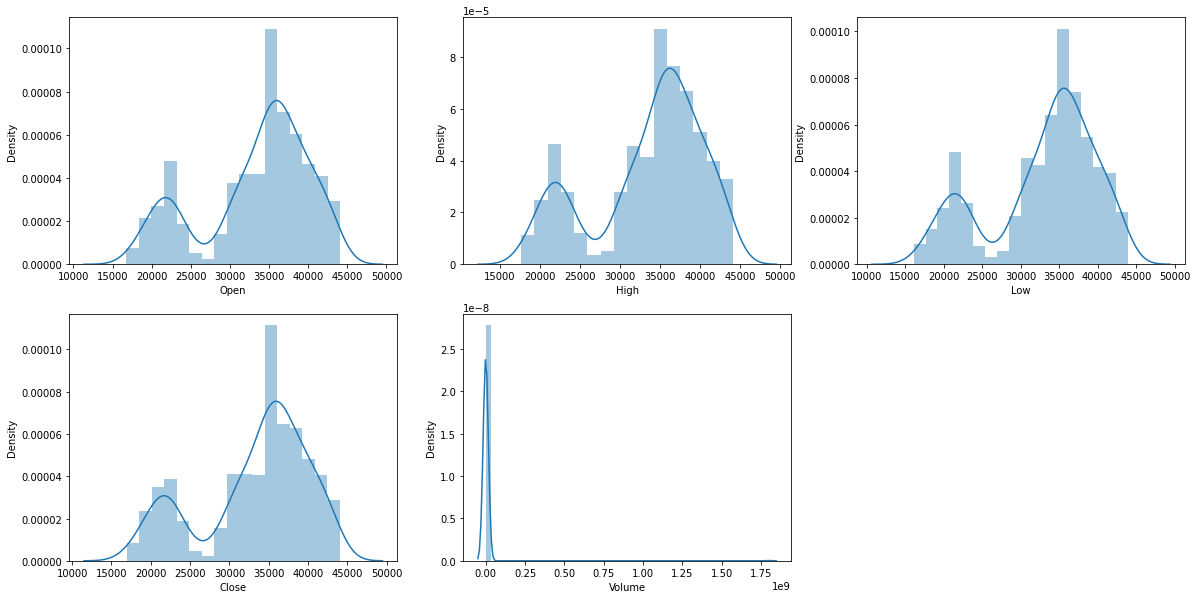

In [7]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(bnf[col])
plt.show()

##### Define your trading strategy: Creating a simple moving average crossover strategy, where you buy when the short-term moving average (e.g., 20-day MA) crosses above the long-term moving average (e.g., 50-day MA), and sell when the short-term MA crosses below the long-term MA.

In [8]:
# Define short-term and long-term moving averages
short_ma = 20
long_ma = 50

# Create short-term and long-term moving averages
bnf['short_ma'] = bnf['Close'].rolling(window=short_ma).mean()
bnf['long_ma'] = bnf['Close'].rolling(window=long_ma).mean()

# Create a signal when the short-term MA crosses above the long-term MA
bnf['signal'] = np.where(bnf['short_ma'] > bnf['long_ma'], 1, 0)

# Create a position column based on the signal
bnf['position'] = bnf['signal'].shift(1)

### Calculate returns: Calculate the returns generated by your trading strategy.

In [9]:
# Calculate daily returns
bnf['returns'] = bnf['Close'].pct_change()

# Calculate strategy returns
bnf['strategy_returns'] = bnf['position'] * bnf['returns']

# Calculate cumulative returns
bnf['cumulative_returns'] = (1 + bnf['strategy_returns']).cumprod()

### Analyze results: Analyze the backtest results using metrics such as cumulative returns, annualized return, Sharpe ratio, maximum drawdown, etc.

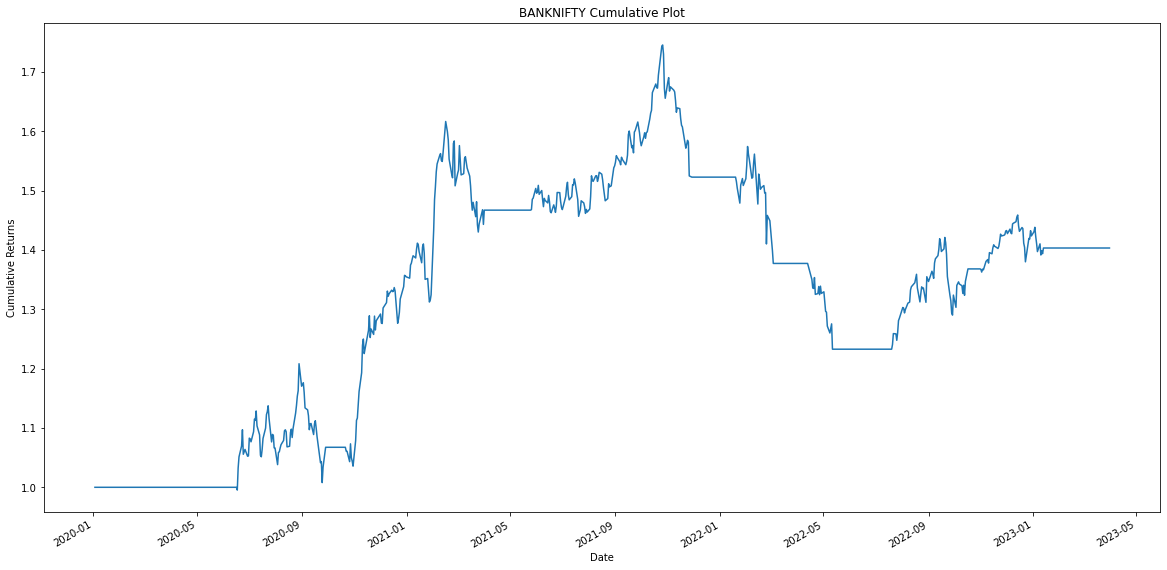

In [11]:
# Calculate annualized return
annualized_return = ((bnf['cumulative_returns'][-1])**(252/len(bnf)))-1

# Calculate Sharpe ratio
sharpe_ratio = (bnf['strategy_returns'].mean() / bnf['strategy_returns'].std()) * np.sqrt(252)

# Calculate maximum drawdown
cumulative_returns = bnf['cumulative_returns']
max_drawdown = ((cumulative_returns.cummax() - cumulative_returns)/cumulative_returns.cummax()).max()

# Plot cumulative returns
bnf['cumulative_returns'].plot(figsize=(20, 10))
plt.title('BANKNIFTY Cumulative Plot')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

##### Note: The above example is just a simple illustration of how to use yfinance to backtest a BankNifty strategy. You can modify the strategy and analyze the results further to suit your specific needs.